In [ ]:
!pip install --upgrade --no-cache-dir git+https://github.com/StreamAlpha/tvdatafeed.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/StreamAlpha/tvdatafeed.git to /tmp/pip-req-build-m3y5pyip
  Running command git clone --filter=blob:none --quiet https://github.com/StreamAlpha/tvdatafeed.git /tmp/pip-req-build-m3y5pyip
  Resolved https://github.com/StreamAlpha/tvdatafeed.git to commit a7034f04509b67224618917c29272796e4fff858
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.6 MB/s eta 0:00:00
  Created wheel for tvdatafeed: filename=tvdatafeed-2.1.0-py3-none-any.whl size=7570 sha256=44491acfa7d74fba63ca23a83eb966e1933a677941644b55457c485077e884a9
  Stored in directory: /tmp/pip-ephem-wheel-cache-y00mt5oq/wheels/61/5f/7d/953ab2e3eaea9db6badc898aec3ff220779870e60932341e72
Successfully built tvdatafeed


In [ ]:
from tvDatafeed import TvDatafeed, Interval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
username = 'sedissam'
password = '123Issam'

tv = TvDatafeed(username, password) #username, password

In [ ]:
TSL = tv.get_hist(symbol='DXY', exchange='TVC', interval=Interval.in_daily, n_bars=1000)

In [ ]:
TSL.to_csv("nvideDatasetForLSTM.csv")

In [ ]:
TSL['close_shifted'] = TSL['close'].shift(periods=1)

In [ ]:
TSL['target'] = TSL['close_shifted'] - TSL['close'] 

In [ ]:
f = lambda x: (1 - np.sign(x)) / 2
TSL['tar'] = TSL['target'].apply(f)

In [ ]:
TSL['tar'] = TSL['tar'].shift(periods=-1)
TSL

,symbol,open,high,low,close,volume,close_shifted,target,tar
datetime,,,,,,,,,
2019-04-24 23:00:00,TVC:DXY,98.096,98.322,97.987,98.145,0.0,NaN,NaN,0.0
2019-04-25 23:00:00,TVC:DXY,98.120,98.330,97.851,98.051,0.0,98.145,0.094,0.0
2019-04-28 21:00:00,TVC:DXY,98.033,98.104,97.830,97.852,0.0,98.051,0.199,0.0
2019-04-29 23:00:00,TVC:DXY,97.845,97.892,97.439,97.520,0.0,97.852,0.332,1.0
2019-04-30 23:00:00,TVC:DXY,97.528,97.728,97.149,97.616,0.0,97.520,-0.096,1.0
...,...,...,...,...,...,...,...,...,...
2023-02-17 00:00:00,TVC:DXY,104.200,104.667,103.840,103.881,0.0,104.096,0.215,0.0
2023-02-19 22:00:00,TVC:DXY,103.881,104.089,103.760,103.760,0.0,103.881,0.121,1.0
2023-02-21 00:00:00,TVC:DXY,103.914,104.262,103.774,104.097,0.0,103.760,-0.337,1.0


In [ ]:
TSL = TSL.drop('target', axis=1)
TSL = TSL.drop('close_shifted', axis=1)
TSL

,symbol,open,high,low,close,volume,tar
datetime,,,,,,,
2019-04-24 23:00:00,TVC:DXY,98.096,98.322,97.987,98.145,0.0,0.0
2019-04-25 23:00:00,TVC:DXY,98.120,98.330,97.851,98.051,0.0,0.0
2019-04-28 21:00:00,TVC:DXY,98.033,98.104,97.830,97.852,0.0,0.0
2019-04-29 23:00:00,TVC:DXY,97.845,97.892,97.439,97.520,0.0,1.0
2019-04-30 23:00:00,TVC:DXY,97.528,97.728,97.149,97.616,0.0,1.0
...,...,...,...,...,...,...,...
2023-02-17 00:00:00,TVC:DXY,104.200,104.667,103.840,103.881,0.0,0.0
2023-02-19 22:00:00,TVC:DXY,103.881,104.089,103.760,103.760,0.0,1.0
2023-02-21 00:00:00,TVC:DXY,103.914,104.262,103.774,104.097,0.0,1.0


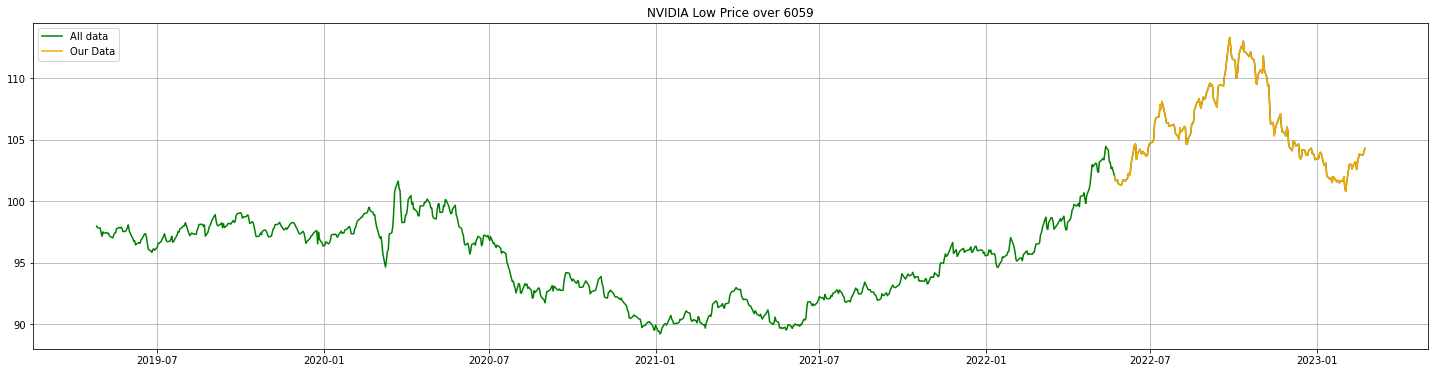

In [ ]:
plt.figure(figsize=(25, 6))
#plt.subplot(2, 2, 1)
plt.grid(True, which='both')
plt.plot(TSL.index, TSL['low'], color="green")
plt.plot(TSL.tail(199).index, TSL.tail(199)['low'], color="orange")
plt.legend(["All data", "Our Data"], loc="upper left")
plt.title('NVIDIA Low Price over 6059')
plt.savefig('invedia_history.png', transparent=True)

In [ ]:
TSL.head(5)

,symbol,open,high,low,close,volume,tar
datetime,,,,,,,
2019-03-06 14:30:00,NASDAQ:NFLX,353.60,359.88,351.70,359.61,6211895.0,0.0
2019-03-07 14:30:00,NASDAQ:NFLX,360.16,362.86,350.50,352.60,6151331.0,0.0
2019-03-08 14:30:00,NASDAQ:NFLX,345.75,349.92,342.47,349.60,6898838.0,1.0
2019-03-11 13:30:00,NASDAQ:NFLX,352.00,358.98,350.03,358.86,5387285.0,0.0
2019-03-12 13:30:00,NASDAQ:NFLX,359.37,360.13,353.80,356.27,5164571.0,1.0


In [ ]:
#NVIDIA['date'] = pd.to_datetime(NVIDIA.date)
TSL.head()

,symbol,open,high,low,close,volume,tar
datetime,,,,,,,
2019-04-24 23:00:00,TVC:DXY,98.096,98.322,97.987,98.145,0.0,0.0
2019-04-25 23:00:00,TVC:DXY,98.120,98.330,97.851,98.051,0.0,0.0
2019-04-28 21:00:00,TVC:DXY,98.033,98.104,97.830,97.852,0.0,0.0
2019-04-29 23:00:00,TVC:DXY,97.845,97.892,97.439,97.520,0.0,1.0
2019-04-30 23:00:00,TVC:DXY,97.528,97.728,97.149,97.616,0.0,1.0


In [ ]:
date = TSL.index

In [ ]:
TSL['Date'] = date

In [ ]:
TSL.head()

,symbol,open,high,low,close,volume,tar,Date
datetime,,,,,,,,
2019-04-24 23:00:00,TVC:DXY,98.096,98.322,97.987,98.145,0.0,0.0,2019-04-24 23:00:00
2019-04-25 23:00:00,TVC:DXY,98.120,98.330,97.851,98.051,0.0,0.0,2019-04-25 23:00:00
2019-04-28 21:00:00,TVC:DXY,98.033,98.104,97.830,97.852,0.0,0.0,2019-04-28 21:00:00
2019-04-29 23:00:00,TVC:DXY,97.845,97.892,97.439,97.520,0.0,1.0,2019-04-29 23:00:00
2019-04-30 23:00:00,TVC:DXY,97.528,97.728,97.149,97.616,0.0,1.0,2019-04-30 23:00:00


In [ ]:
TSL = TSL.drop('symbol', axis=1)
TSL = TSL.reset_index(drop=True)
TSL.to_csv('data.csv', index=False)

In [ ]:
TSL.tail()

,open,high,low,close,volume,tar,Date
995,104.200,104.667,103.840,103.881,0.0,0.0,2023-02-17 00:00:00
996,103.881,104.089,103.760,103.760,0.0,1.0,2023-02-19 22:00:00
997,103.914,104.262,103.774,104.097,0.0,1.0,2023-02-21 00:00:00
998,104.128,104.595,104.006,104.496,0.0,1.0,2023-02-22 00:00:00
999,104.499,104.683,104.308,104.602,0.0,NaN,2023-02-23 00:00:00


In [ ]:
TSL.sort_values(by='Date', inplace=True)
TSL.head()

,open,high,low,close,volume,tar,Date
0,98.096,98.322,97.987,98.145,0.0,0.0,2019-04-24 23:00:00
1,98.120,98.330,97.851,98.051,0.0,0.0,2019-04-25 23:00:00
2,98.033,98.104,97.830,97.852,0.0,0.0,2019-04-28 21:00:00
3,97.845,97.892,97.439,97.520,0.0,1.0,2019-04-29 23:00:00
4,97.528,97.728,97.149,97.616,0.0,1.0,2019-04-30 23:00:00


In [ ]:
TSL = TSL.drop('Date', axis=1)

In [ ]:
TSL.tail()

,open,high,low,close,volume,tar
995,104.200,104.667,103.840,103.881,0.0,0.0
996,103.881,104.089,103.760,103.760,0.0,1.0
997,103.914,104.262,103.774,104.097,0.0,1.0
998,104.128,104.595,104.006,104.496,0.0,1.0
999,104.499,104.683,104.308,104.602,0.0,NaN


In [ ]:
TSL.iloc[-1]['close']

104.602

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

#stock_data = pd.read_csv('data.csv')

#closing_prices = stock_data['close'].values.reshape(-1,1)
closing_prices = TSL['close'].values.reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
closing_prices.shape

(1000, 1)

In [ ]:
train_size = int(len(closing_prices) * 0.7)
test_size = len(closing_prices) - train_size
train_data, test_data = closing_prices[0:train_size,:], closing_prices[train_size:len(closing_prices),:]
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


def create_dataset(dataset, target, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        #dataY.append(target.iloc[i+time_step]['tar'])
    return np.array(dataX), np.array(dataY)

time_step = 200
X_train, y_train = create_dataset(train_data, TSL, time_step)
X_test, y_test = create_dataset(test_data, TSL, time_step)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
scaler.data_max_

array([102.936])

In [ ]:
TSL

,open,high,low,close,volume,tar
0,98.096,98.322,97.987,98.145,0.0,0.0
1,98.120,98.330,97.851,98.051,0.0,0.0
2,98.033,98.104,97.830,97.852,0.0,0.0
3,97.845,97.892,97.439,97.520,0.0,1.0
4,97.528,97.728,97.149,97.616,0.0,1.0
...,...,...,...,...,...,...
995,104.200,104.667,103.840,103.881,0.0,0.0
996,103.881,104.089,103.760,103.760,0.0,1.0
997,103.914,104.262,103.774,104.097,0.0,1.0
998,104.128,104.595,104.006,104.496,0.0,1.0


In [ ]:
y_test.shape

(249,)

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
from keras.layers import Dense, LSTM, Dropout
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
8/8 [==============================] - 8s 465ms/step - loss: 0.0469 - val_loss: 0.1097
Epoch 2/100
8/8 [==============================] - 3s 410ms/step - loss: 0.0155 - val_loss: 0.1204
Epoch 3/100
8/8 [==============================] - 3s 323ms/step - loss: 0.0103 - val_loss: 0.0406
Epoch 4/100
8/8 [==============================] - 3s 331ms/step - loss: 0.0087 - val_loss: 0.0413
Epoch 5/100
8/8 [==============================] - 3s 329ms/step - loss: 0.0085 - val_loss: 0.0227
Epoch 6/100
8/8 [==============================] - 3s 353ms/step - loss: 0.0075 - val_loss: 0.0192
Epoch 7/100
8/8 [==============================] - 3s 356ms/step - loss: 0.0071 - val_loss: 0.0254
Epoch 8/100
8/8 [==============================] - 3s 324ms/step - loss: 0.0073 - val_loss: 0.0163
Epoch 9/100
8/8 [==============================] - 3s 329ms/step - loss: 0.0075 - val_loss: 0.0240
Epoch 10/100
8/8 [==============================] - 3s 330ms/step - loss: 0.0072 - val_loss: 0.0277
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

4/4 [==============================] - 1s 62ms/step


In [ ]:
y_test.shape

(99,)

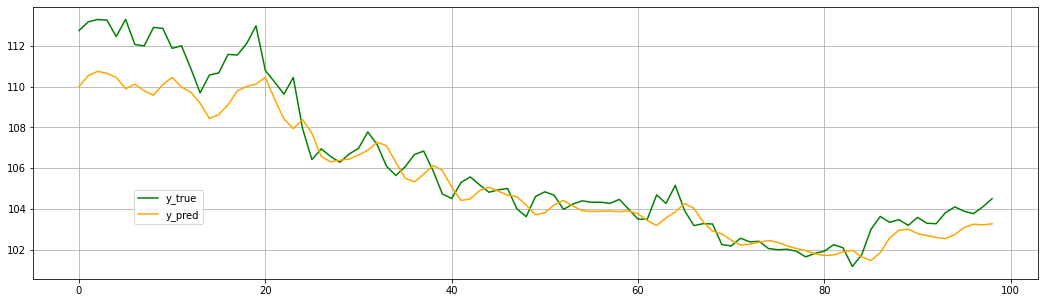

In [ ]:
L = [i for i in range(99)]
test = scaler.inverse_transform(y_test.reshape(99, 1))
plt.figure(figsize=(18, 5))
plt.grid()
plt.plot(L, test, color='green')
plt.plot(L, y_pred, color='orange')
plt.legend(["y_true", "y_pred"], loc=(0.1, 0.2))
#plt.plot(L, PRED)
plt.savefig('LSTM_pred.png', transparent=True)

In [ ]:
y_test[-1].shape

()

In [ ]:
test1 = X_test[-100]
test1 = np.delete(test1, 0)
prido = scaler.inverse_transform(y_test[-1].reshape(1,1))
test1 = np.append(test1, prido)
predection = model.predict(test1.reshape(1, 100, 1))
predection = scaler.inverse_transform

1/1 [==============================] - 0s 30ms/step


In [ ]:
predection

array([[1.5718479]], dtype=float32)

In [ ]:
predection = scaler.inverse_transform(predection.reshape(-1,1))
predection

array([[454749.4]], dtype=float32)

In [ ]:
X_test[-1].shape

(100, 1)

In [ ]:
y_pred = model.predict(X_test[-1].reshape(1, 100, 1))

1/1 [==============================] - 0s 34ms/step


In [ ]:
y_pred.shape

(1, 1)

In [ ]:
y_pred = scaler.inverse_transform(y_pred)

In [ ]:
y_pred

array([[194.96295]], dtype=float32)

In [ ]:
y_test[-1]

0.23749119097956317

In [ ]:
TSL.tail()

,open,high,low,close,volume
595,211.755,214.66,206.11,214.24,182108581.0
596,210.780,217.65,201.84,202.04,229586538.0
597,199.985,208.44,197.50,208.31,213738549.0
598,204.990,209.71,197.22,197.37,180018588.0
599,197.930,200.87,191.78,197.33,89599196.0


In [ ]:
PRED = np.array(PRED)
PRED = PRED.reshape((6,))